Imports

In [2]:
import cv2
import numpy as np
import skimage
import imageio
import mpmath
import matplotlib.pyplot as plt
import seaborn as sns
import PIL

Read and Display Images

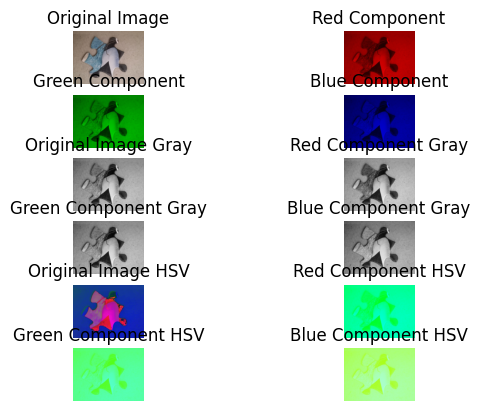

In [3]:
img = cv2.imread('Images/image-35.jpg')
img = img[:,:,::-1]
red, green, blue = cv2.split(img)
empty = red * 0

red_image = cv2.merge([red, empty, empty])
green_image = cv2.merge([empty, green, empty])
blue_image = cv2.merge([empty, empty, blue])

plt.subplot(6, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(6, 2, 2)
plt.imshow(red_image)
plt.title('Red Component')
plt.axis('off')

plt.subplot(6, 2, 3)
plt.imshow(green_image)
plt.title('Green Component')
plt.axis('off')

plt.subplot(6, 2, 4)
plt.imshow(blue_image)
plt.title('Blue Component')
plt.axis('off')

plt.subplot(6, 2, 5)
plt.imshow(skimage.color.rgb2gray(img),cmap="gray")
plt.title('Original Image Gray')
plt.axis('off')

plt.subplot(6, 2, 6)
plt.imshow(skimage.color.rgb2gray(red_image),cmap="gray")
plt.title('Red Component Gray')
plt.axis('off')

plt.subplot(6, 2, 7)
plt.imshow(skimage.color.rgb2gray(green_image),cmap="gray")
plt.title('Green Component Gray')
plt.axis('off')

plt.subplot(6, 2, 8)
plt.imshow(skimage.color.rgb2gray(blue_image),cmap="gray")
plt.title('Blue Component Gray')
plt.axis('off')

plt.subplot(6, 2, 9)
plt.imshow(skimage.color.rgb2hsv(img))
plt.title('Original Image HSV')
plt.axis('off')

plt.subplot(6, 2, 10)
plt.imshow(skimage.color.rgb2hsv(red_image))
plt.title('Red Component HSV')
plt.axis('off')

plt.subplot(6, 2, 11)
plt.imshow(skimage.color.rgb2hsv(green_image))
plt.title('Green Component HSV')
plt.axis('off')

plt.subplot(6, 2, 12)
plt.imshow(skimage.color.rgb2hsv(blue_image))
plt.title('Blue Component HSV')
plt.axis('off')

plt.show()


Section 4

In [4]:
print("1. Dimensions:",img.shape)
mask = skimage.color.rgb2gray(cv2.imread('Images/mask-35.png'))
white_pix = np.sum(mask==1)
print("2. Num white pixels:",white_pix)

#=========================================================================

gray_img = skimage.color.rgb2gray(img)
print("3. Max value in grayscale(Noramalized):",np.max(gray_img))

img_with_mask = gray_img*mask
print("4. Max pixel in puzzel(Normalized):",np.max(img_with_mask))

print("5. Mean intensity for image:",np.mean(gray_img))

print("6. Mean brightness of puzzle pixels",np.mean(gray_img[mask == 1]))

print("7. Mean brightness of background pixels",np.mean(gray_img[mask != 1]))

print("8. Variance of puzzle pixels",np.var(gray_img[mask == 1]))
print("9. Variance of bakground pixels",np.var(gray_img[mask != 1]))

1. Dimensions: (450, 600, 3)
2. Num white pixels: 73196
3. Max value in grayscale(Noramalized): 0.8985443137254902
4. Max pixel in puzzel(Normalized): 0.8985443137254902
5. Mean intensity for image: 0.5384709828395062
6. Mean brightness of puzzle pixels 0.4428718293081482
7. Mean brightness of background pixels 0.5740265388336999
8. Variance of puzzle pixels 0.03828601259838955
9. Variance of bakground pixels 0.008189250151975785


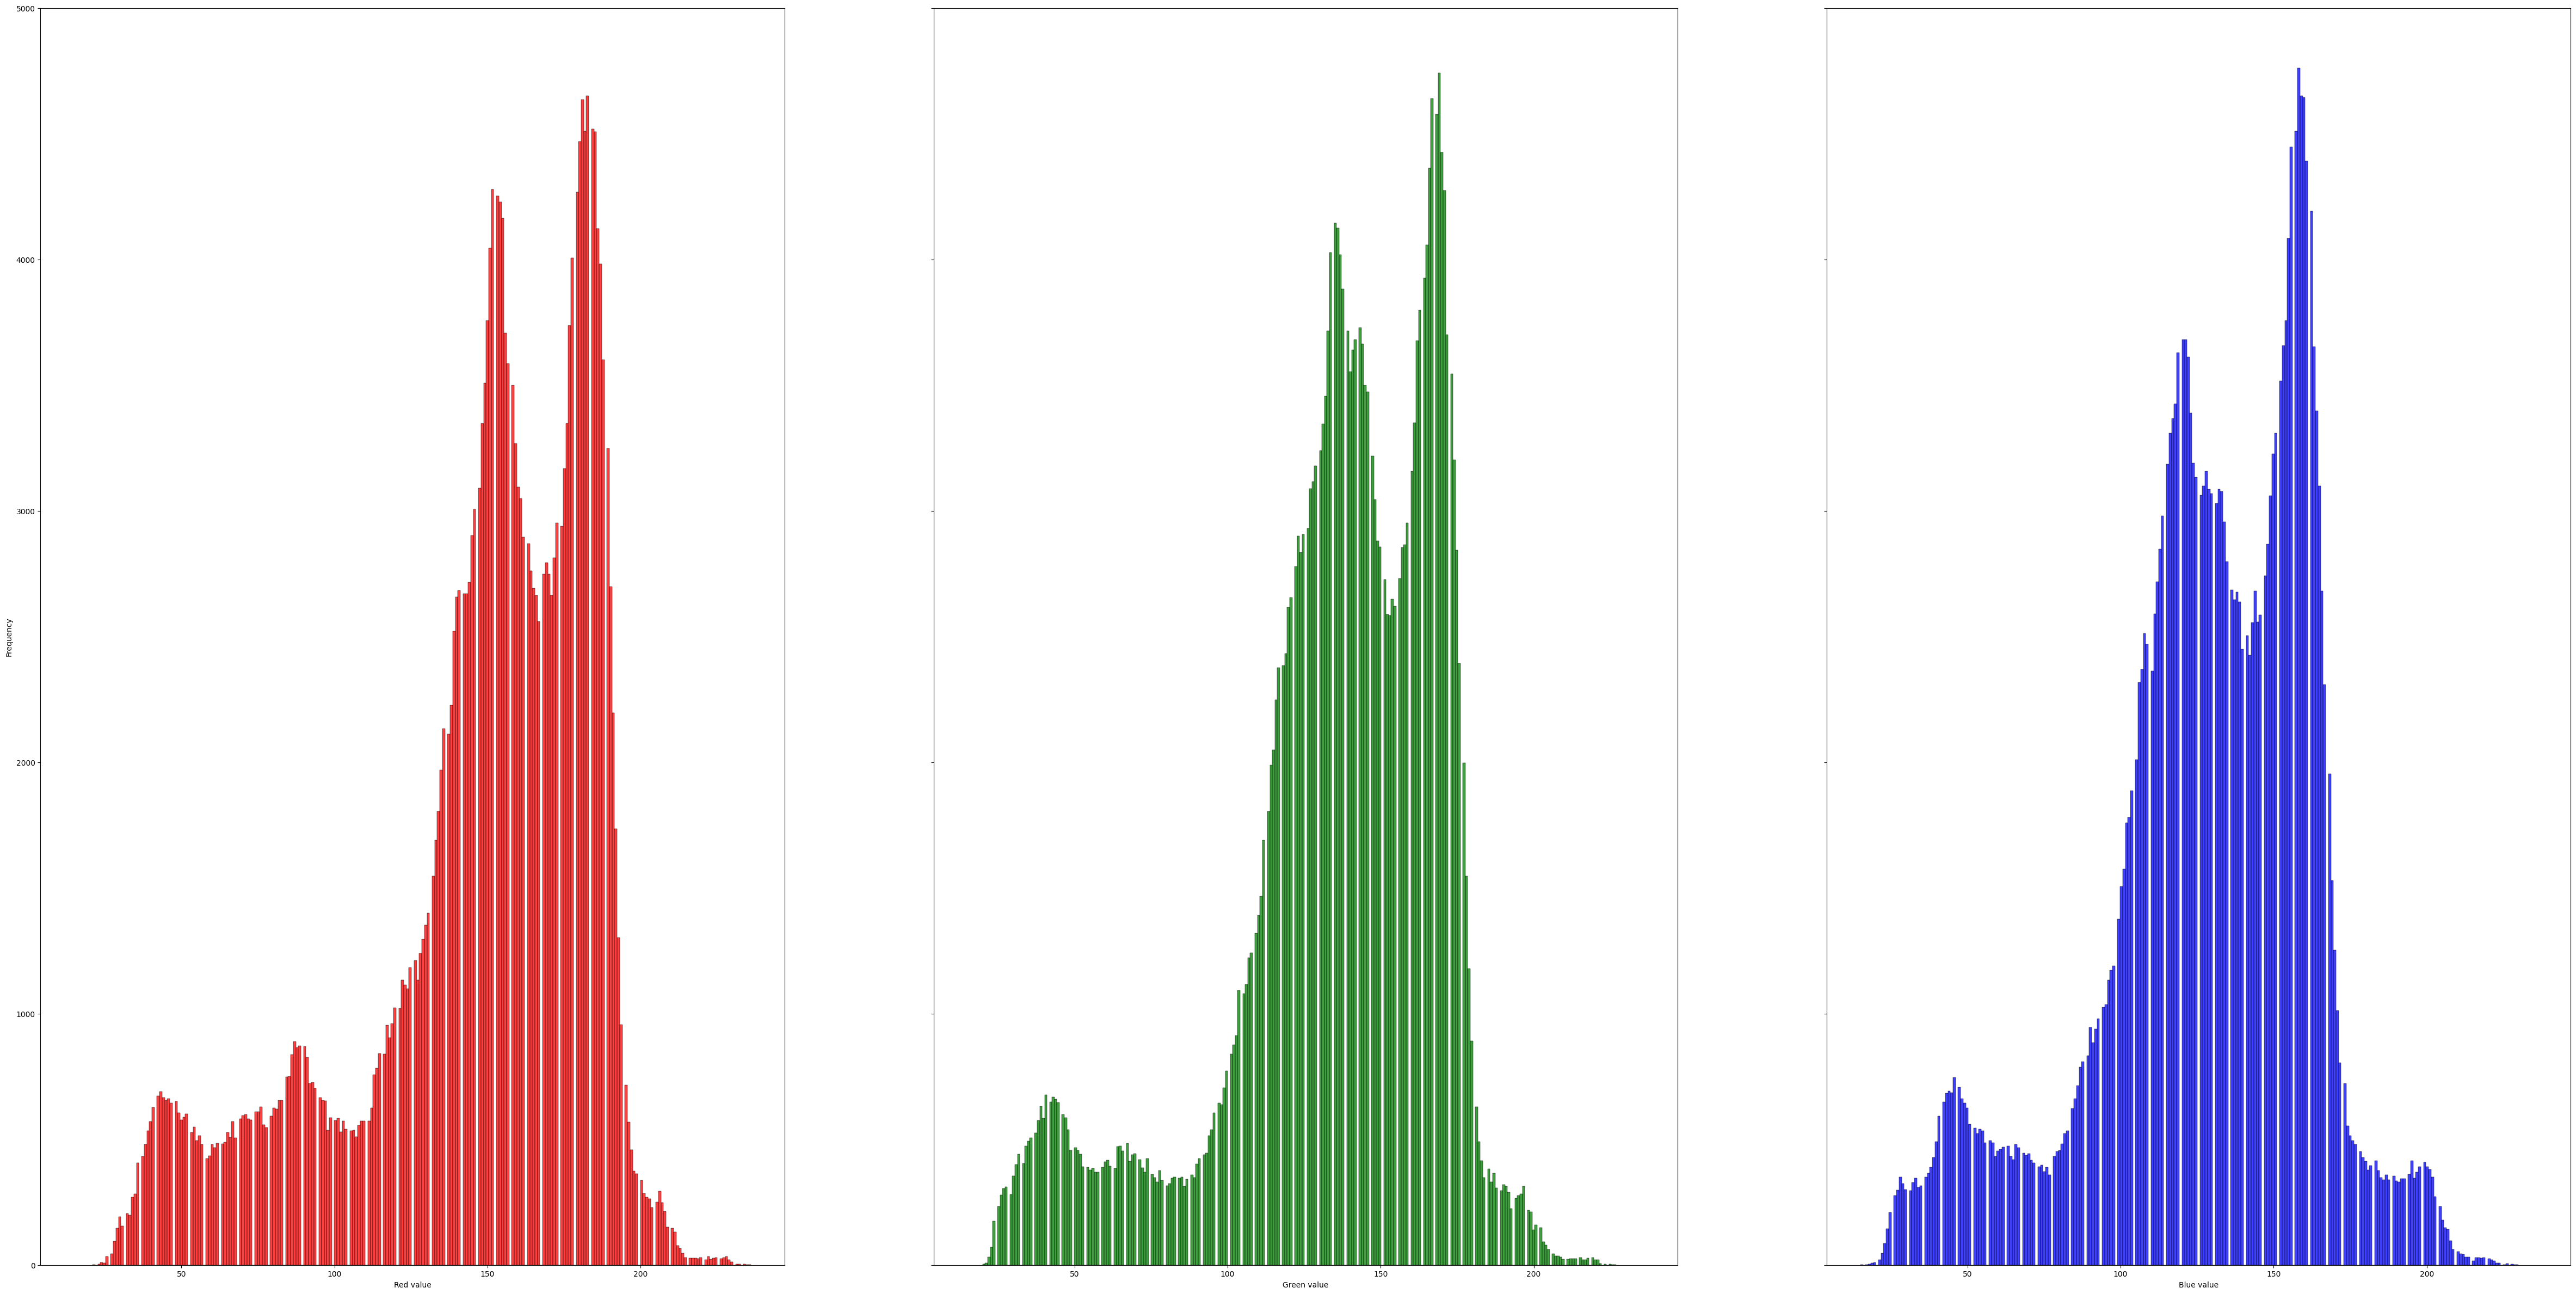

In [5]:
red_hist =  red.flatten()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30), sharex=True, sharey=True)
plt.subplot(1,3,1)
sns.histplot( red_hist, bins=256, kde=False,color='red')
plt.xlabel("Red value")
plt.ylabel("Frequency")

green_hist =  green.flatten()

plt.subplot(1,3,2)
sns.histplot( green_hist, bins=256, kde=False,color='green')
plt.xlabel("Green value")
plt.ylabel("Frequency")

blue_hist =  blue.flatten()

plt.subplot(1,3,3)
sns.histplot( blue_hist, bins=256, kde=False,color='blue')
plt.xlabel("Blue value")
plt.ylabel("Frequency")
plt.show()

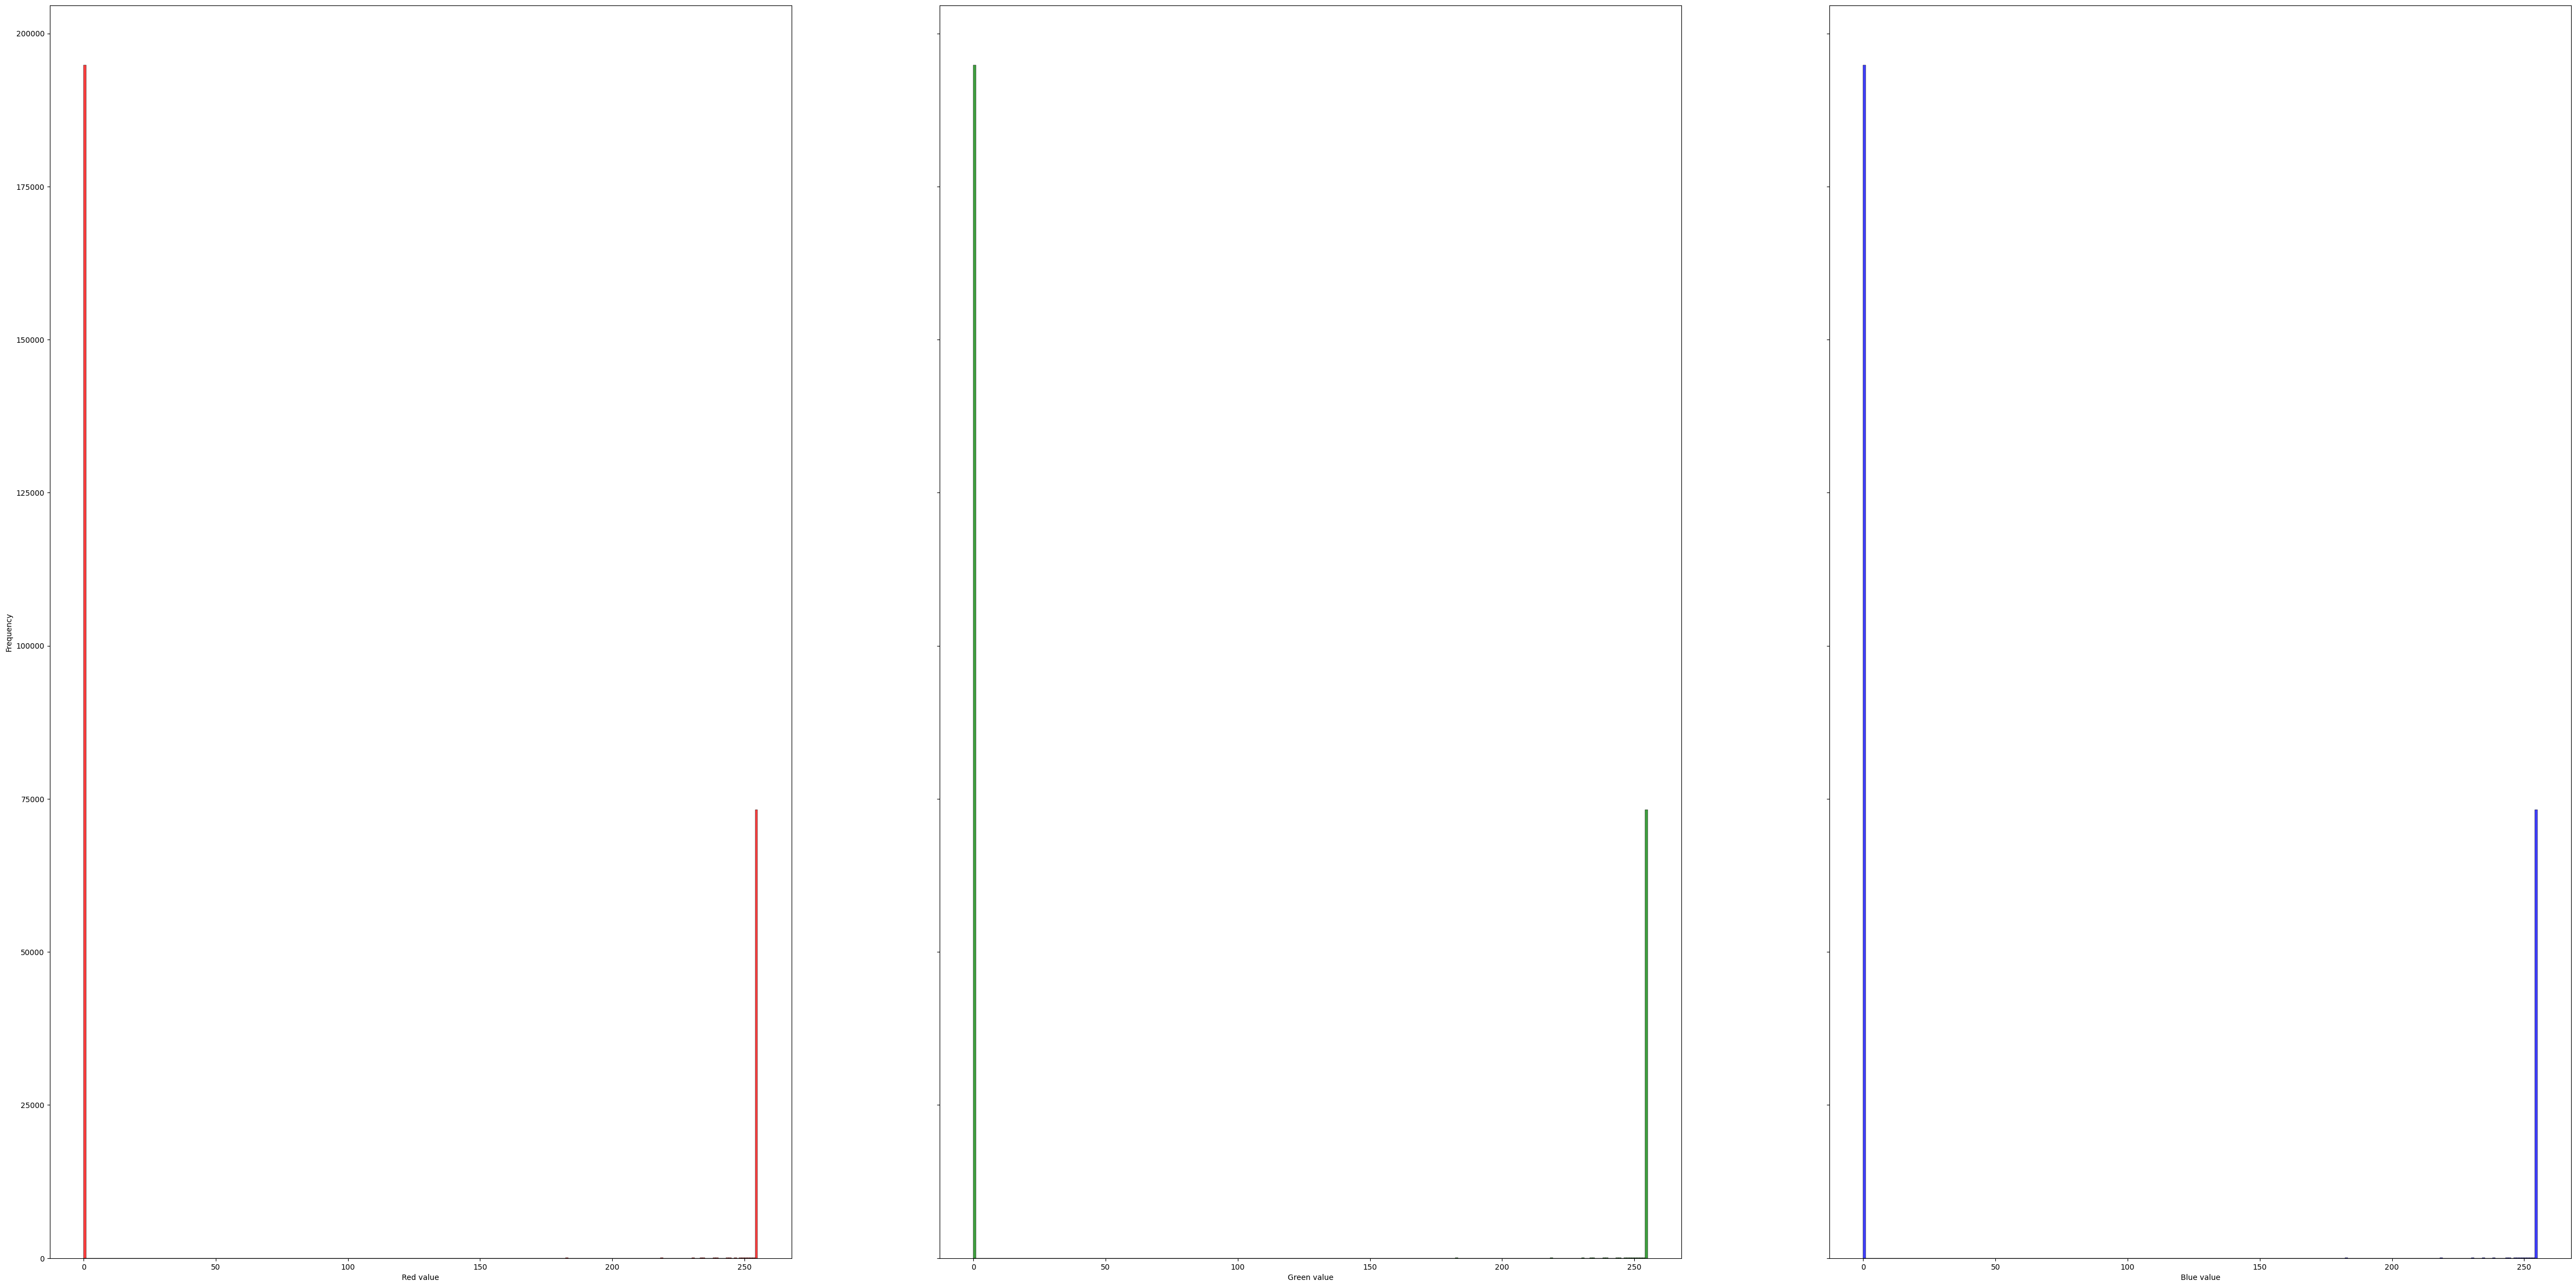

In [6]:
mask = cv2.imread("Images/mask-35.png")
mask = mask[:,:,::-1]

m_red ,m_green ,m_blue  = cv2.split(mask)

red_hist =  m_red.flatten()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30), sharex=True, sharey=True)
plt.subplot(1,3,1)
sns.histplot( red_hist, bins=256, kde=False,color='red')
plt.xlabel("Red value")
plt.ylabel("Frequency")

green_hist =  m_green.flatten()

plt.subplot(1,3,2)
sns.histplot( green_hist, bins=256, kde=False,color='green')
plt.xlabel("Green value")
plt.ylabel("Frequency")

blue_hist =  m_blue.flatten()

plt.subplot(1,3,3)
sns.histplot( blue_hist, bins=256, kde=False,color='blue')
plt.xlabel("Blue value")
plt.ylabel("Frequency")
plt.show()

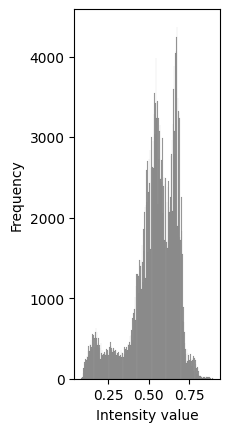

In [7]:
gray_hist =  gray_img.flatten()

plt.subplot(1,3,3)
sns.histplot( gray_hist, bins=256, kde=False,color='gray')
plt.xlabel("Intensity value")
plt.ylabel("Frequency")
plt.show()

# 5 BackGround classifier

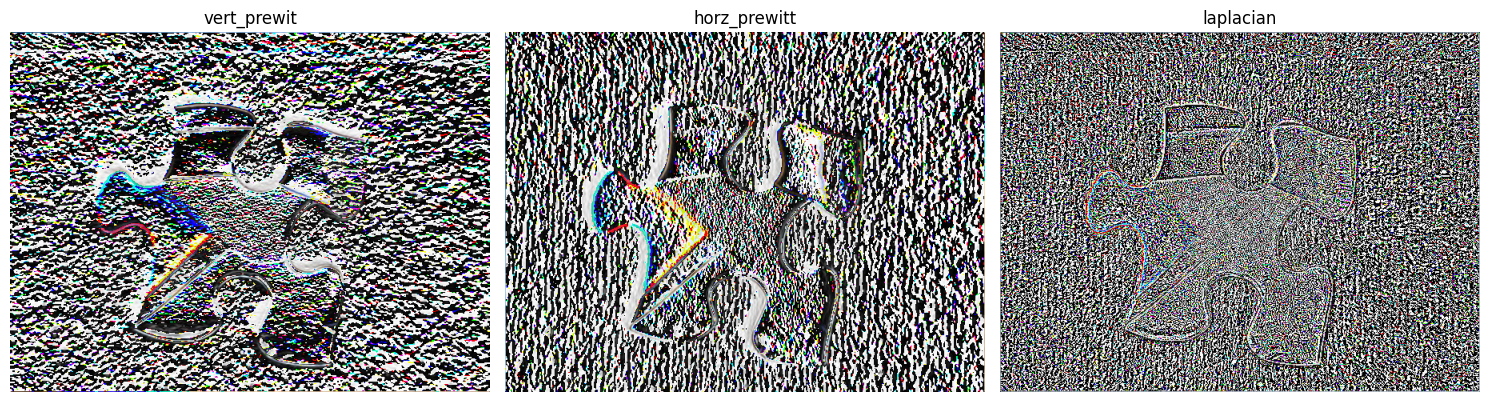

In [9]:
# 1
# construct custom filter

def custom_filter(size):
    return np.ones((size,size))

def convolve_filter(image,filter:np.array):
    # Pad the image
    size = len(filter)
    padding_size = size//2
    padded_image = np.pad(image, pad_width=padding_size, mode='constant', constant_values=0)
    # flip the filter
    flipped_filter = np.flipud(np.fliplr(filter))
    # convolution
    
    return_image = np.zeros_like(image)
    #iterate over the padded image
    for x in range(len(image)):
        for y in range(len(image[0])):
            
            region = padded_image[
                x:x+size,
                y:y+size
                ]
            
            conv_value = np.sum(region * flipped_filter)
            return_image[x,y] = conv_value
    return return_image       
        
def convolve_rgb(image,filter):
    # this code splits the image into each channel, convolves then merges the channels
    red, green, blue = cv2.split(image)          
    red = convolve_filter(red,filter)
    green = convolve_filter(green,filter)
    blue = convolve_filter(blue,filter)
    rgb_image = cv2.merge([red,green,blue])
    return rgb_image

vertical_prewitt = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
])
horizontal_prewitt = np.array([
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
])

laplacian = np.array([
    [0,-1,0],
    [-1,4,-1],
    [0,-1,0]
])

image = cv2.imread("images/image-83.jpg")

# Calculate convolved images
resultant_vert_prewitt = convolve_rgb(image,vertical_prewitt)
resultant_horz_prewitt = convolve_rgb(image,horizontal_prewitt)
resultant_laplacian = convolve_rgb(image,laplacian)
# display images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(resultant_vert_prewitt)
axes[0].set_title('vert_prewit')
axes[0].axis('off')

axes[1].imshow(resultant_horz_prewitt)
axes[1].set_title('horz_prewitt')
axes[1].axis('off')

axes[2].imshow(resultant_laplacian)
axes[2].set_title('laplacian')
axes[2].axis('off')
plt.tight_layout()
plt.show()

From the documentation it shows that the filter2D function does not execute convolution, it actually does correlation

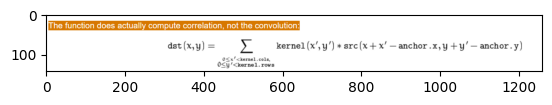

In [10]:

image = cv2.imread("images/Documentation.png")
plt.imshow(image)
plt.show()